In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [3]:
child_reg = pd.read_csv('/Users/Blessing/Desktop/MSC_Dissertation_Data/Datasets/Chid_Register.csv')
HH_reg = pd.read_csv('/Users/Blessing/Desktop/MSC_Dissertation_Data/Datasets/Household_register.csv')


In [4]:
child_reg.head()

,S/No,State,LGA,Ward,CBO,Date of enrollment (yyyy-mm-dd),HH Unique Id,OVC Id,Enrollment setting,Address,...,Current Viral load Result,Current Viral load Status,Name of school,Form/Grade,relationship to child,Child has case plan?,Date case plan developed,Last modified,Recorded by,CLASS
0,1,Plateau,Langtang North,Mabudi,AIDS CARE EDUCATION AND TRAINING SOCIETY,30/03/2022,PLA/LNN/ACE/00149,PLA/LNN/ACE/00149/00014,Community,ANGWAN UBANDOMA CLOSE TO PONZHI LOHKANA HOUSE ...,...,NaN,NaN,NaN,Primary 2,Grandparents,No,Mon Jan 01 00:00:00 WAT 1900,03/04/2022,acetnigeria2007,0
1,2,Plateau,Shendam,Yelwa,AIDS CARE EDUCATION AND TRAINING SOCIETY,12/12/2022,PLA/SHE/ACE/00967,PLA/SHE/ACE/00967/00002,Community,ANGWAN CONGO YELWA INSIDE YATE YIRKUK HOUSE,...,NaN,NaN,NaN,Primary 2,Mother,No,Mon Jan 01 00:00:00 WAT 1900,29/12/2022,acetnigeria2007,1
2,3,Plateau,Mangu,Mangu l,CENTER FOR CHILDREN IN CRISES,28/03/2022,PLA/MAN/CEN/00167,PLA/MAN/CEN/00167/00003,Community,OPPOSITE COCIN CHURCH MARISH,...,NaN,NaN,NaN,NaN,Mother,No,Mon Jan 01 00:00:00 WAT 1900,30/03/2022,CENCHIC,0
3,4,Plateau,Jos South,Chugwi,HEAL THE YOUTH FOUNDATION,24/05/2022,PLA/JSS/HTY/00319,PLA/JSS/HTY/00319/00004,Community,AFTER LEA CHUGWI,...,NaN,NaN,NaN,NaN,Mother,No,Mon Jan 01 00:00:00 WAT 1900,01/06/2022,htyf,0
4,5,Plateau,Mangu,Panyam,CENTER FOR CHILDREN IN CRISES,09/01/2022,PLA/MAN/CEN/00074,PLA/MAN/CEN/00074/00001,Facility,MARBEL BEHING COCIN CHURCH BOKKOS,...,39.0,Suppressed,NaN,NaN,Mother,No,Mon Jan 01 00:00:00 WAT 1900,10/02/2023,CENCHIC,1


In [5]:
HH_reg.head()

,S/No,State,LGA,Ward,CBO,Date of enrollment (yyyy-mm-dd),HH Unique Id,Current age,Sex(M/F),Address,...,Current Risk Assessment,Baseline Adherence,Current Adherence,Baseline Stable,Current Stable,All adolescents 10-17 years of age in the household have key knowledge about preventing HIV infection,"Children, adolescent or caregivers in the household reported experience(s) of violence in the last 6 month",All children and adolescent enrolled in school have attended regularly and progressed in the last year,Caregiver is engaged in economic activities that helps meet the critical needs of the children in the household,Target
0,1,Plateau,Shendam,Yelwa,AIDS CARE EDUCATION AND TRAINING SOCIETY,21/07/2022,PLA/SHE/ACE/00853,35,F,SABON KASUWA SHENDAM,...,Yes,Yes,Yes,No,No,No,No,Yes,No,0
1,2,Plateau,Kanam_QsC1,Dengi,RURAL WOMEN FOUNDATION,14/12/2022,PLA/KAN/RWF/00067,77,F,UNGWAN YIPSHE BEHIND WAHIR BAR HOUSE,...,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,1
2,3,Plateau,Shendam,Yelwa,AIDS CARE EDUCATION AND TRAINING SOCIETY,25/05/2022,PLA/SHE/ACE/00578,57,M,ANGWAN HAYIN MURTALA YELWA,...,Yes,Yes,Yes,Yes,Home gardening support,No,No,Yes,No,1
3,4,Plateau,Kanam_QsC1,Dengi,RURAL WOMEN FOUNDATION,07/12/2022,PLA/KAN/RWF/00012,40,F,"UNGLAN GALADIMA, BEHINDE MUSBAHUN ISLAMIYAH DENGI",...,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,0
4,5,Plateau,Kanam_QsC1,Dengi,RURAL WOMEN FOUNDATION,13/12/2022,PLA/KAN/RWF/00048,36,F,UNGWAN SARKIN AREWA GIDAN MANMAN ABDULLAH MAI ...,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,1


In [6]:
child_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   S/No                                      11296 non-null  int64  
 1   State                                     11296 non-null  object 
 2   LGA                                       11296 non-null  object 
 3   Ward                                      11296 non-null  object 
 4   CBO                                       11296 non-null  object 
 5   Date of enrollment (yyyy-mm-dd)           11296 non-null  object 
 6   HH Unique Id                              11296 non-null  object 
 7   OVC Id                                    11296 non-null  object 
 8   Enrollment setting                        11296 non-null  object 
 9   Address                                   11296 non-null  object 
 10  Current age                       

In [7]:
 HH_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 41 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   S/No                                                                                                             3335 non-null   int64  
 1   State                                                                                                            3335 non-null   object 
 2   LGA                                                                                                              3335 non-null   object 
 3   Ward                                                                                                             3335 non-null   object 
 4   CBO                                 

# Exploratory Data Analysis / Preprocessing

## Data Pruning

In [8]:
# Drop columns not useful to the data analysis
child_reg = child_reg.drop(['S/No','State','Name of school','Facility enrolled','Last modified', 'Recorded by','Facility ID','Address','HH Unique Id','Ward','OVC Id', 'Other enrollment stream','Form/Grade'], axis=1)
HH_reg = HH_reg.drop(['S/No','State','Ward','ART STATUS','HH Unique Id','Facility enrolled','Recorded by'],axis=1)

In [9]:
child_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   LGA                                       11296 non-null  object 
 1   CBO                                       11296 non-null  object 
 2   Date of enrollment (yyyy-mm-dd)           11296 non-null  object 
 3   Enrollment setting                        11296 non-null  object 
 4   Current age                               11296 non-null  object 
 5   Sex(M/F)                                  11296 non-null  object 
 6   Date of Current HIV status                11296 non-null  object 
 7   Current enrollment status                 11296 non-null  object 
 8   Date of current status                    11296 non-null  object 
 9   Main enrollment stream                    11296 non-null  object 
 10  Baseline Safety                   

In [10]:
child_reg.isna().sum()

LGA                                             0
CBO                                             0
Date of enrollment (yyyy-mm-dd)                 0
Enrollment setting                              0
Current age                                     0
Sex(M/F)                                        0
Date of Current HIV status                      0
Current enrollment status                       0
Date of current status                          0
Main enrollment stream                          0
Baseline Safety                                 8
Current Safety                                  0
Baseline HIV status                             0
Current HIV status                              0
Child has birth certificate at baseline?        0
Child has birth certificate currently           0
Baseline in school                              0
Currently in School                             0
Nutrition                                       0
Current Nutrition                               0


In [11]:
HH_reg.isna().sum()

LGA                                                                                                                  0
CBO                                                                                                                  0
Date of enrollment (yyyy-mm-dd)                                                                                      0
Current age                                                                                                          0
Sex(M/F)                                                                                                             0
Address                                                                                                              0
Occupation                                                                                                           0
Education level                                                                                                      0
Current enrollment status                       

## Treat Missing Value

In [12]:
child_reg['Enrolled on treatment?'].fillna(value='No', inplace=True)


if (child_reg['Enrolled on treatment?'] == 'No').all():
    child_reg['Treatment ID'].fillna(value='No', inplace=True)
else:
    child_reg['Treatment ID'].fillna(value='Not enrolled', inplace=True)

HH_reg['Enrolled on treatment'].fillna(value='No', inplace=True)


if (HH_reg['Enrolled on treatment'] == 'No').all():
    HH_reg['Treatment ID'].fillna(value='No', inplace=True)
else:
    HH_reg['Treatment ID'].fillna(value='Not enrolled', inplace=True)


In [13]:
child_reg['Baseline ART STATUS '].fillna(value='Not ART', inplace=True)    
child_reg['Current ART STATUS'].fillna(value='Not ART', inplace=True)
child_reg['Baseline Viral load Result'].fillna(value=0, inplace=True)    
child_reg['Current Viral load Result'].fillna(value=0, inplace=True)
child_reg['Baseline Viral load Status'].fillna(value='no vl', inplace=True)    
child_reg['Current Viral load Status'].fillna(value='no vl', inplace=True)
#child_reg['Child in school'].fillna(value='No', inplace=True)    
#child_reg['Volunteer/Service provider'].fillna(child_reg['Volunteer/Service provider'].mode, inplace=True) 
HH_reg['Baseline ART STATUS '].fillna(value='Not ART', inplace=True)    
HH_reg['Current ART STATUS'].fillna(value='Not ART', inplace=True)
HH_reg['Baseline Viral load Result'].fillna(value=0, inplace=True)    
HH_reg['Current Viral load Result'].fillna(value=0, inplace=True)
#HH_reg['Baseline Viral load Status'].fillna(value='no vl', inplace=True)    
#HH_reg['Current Viral load Status'].fillna(value='no vl', inplace=True)


In [14]:
child_reg.isna().sum()

LGA                                         0
CBO                                         0
Date of enrollment (yyyy-mm-dd)             0
Enrollment setting                          0
Current age                                 0
Sex(M/F)                                    0
Date of Current HIV status                  0
Current enrollment status                   0
Date of current status                      0
Main enrollment stream                      0
Baseline Safety                             8
Current Safety                              0
Baseline HIV status                         0
Current HIV status                          0
Child has birth certificate at baseline?    0
Child has birth certificate currently       0
Baseline in school                          0
Currently in School                         0
Nutrition                                   0
Current Nutrition                           0
Baseline Weight                             0
Baseline Height                   

In [15]:
HH_reg.isna().sum()

LGA                                                                                                                0
CBO                                                                                                                0
Date of enrollment (yyyy-mm-dd)                                                                                    0
Current age                                                                                                        0
Sex(M/F)                                                                                                           0
Address                                                                                                            0
Occupation                                                                                                         0
Education level                                                                                                    0
Current enrollment status                                       

## Check for Duplicate

In [16]:
child_reg.duplicated().sum()

244

## univarate Analysis

### Numerical

In [17]:
child_reg.describe()

,Baseline Weight,Baseline Height,Current Weight,Current Height,Baseline Viral load Result,Current Viral load Result,CLASS
count,11296.0,11296.0,11296.000000,11296.000000,1.129600e+04,1.129600e+04,11296.000000
mean,0.0,0.0,10.949162,44.316286,1.308315e+03,1.543698e+03,0.280011
std,0.0,0.0,17.025734,63.765152,3.556658e+04,3.646958e+04,0.449024
min,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,0.0,0.0,20.500000,112.000000,0.000000e+00,0.000000e+00,1.000000
max,0.0,0.0,190.000000,1105.000000,2.820000e+06,1.910000e+06,1.000000


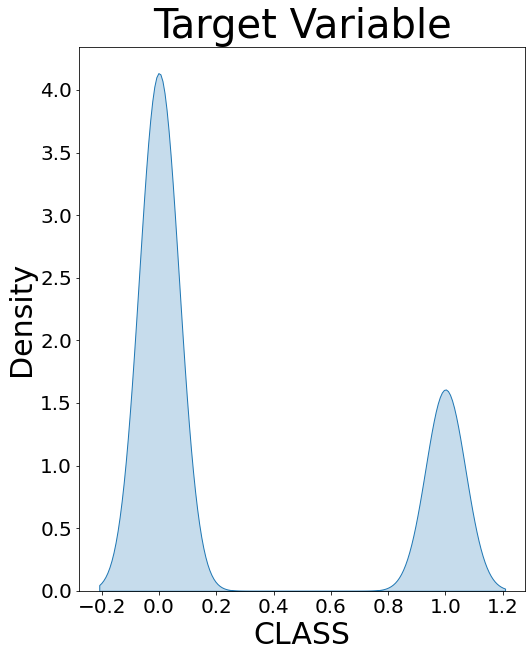

In [18]:
plt.figure(figsize=(8,10))
sns.kdeplot(data=child_reg,x='CLASS',shade=True)
plt.xlabel('CLASS',fontsize=30)
plt.ylabel('Density',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Target Variable", fontsize=40)
plt.show()

### Categorical

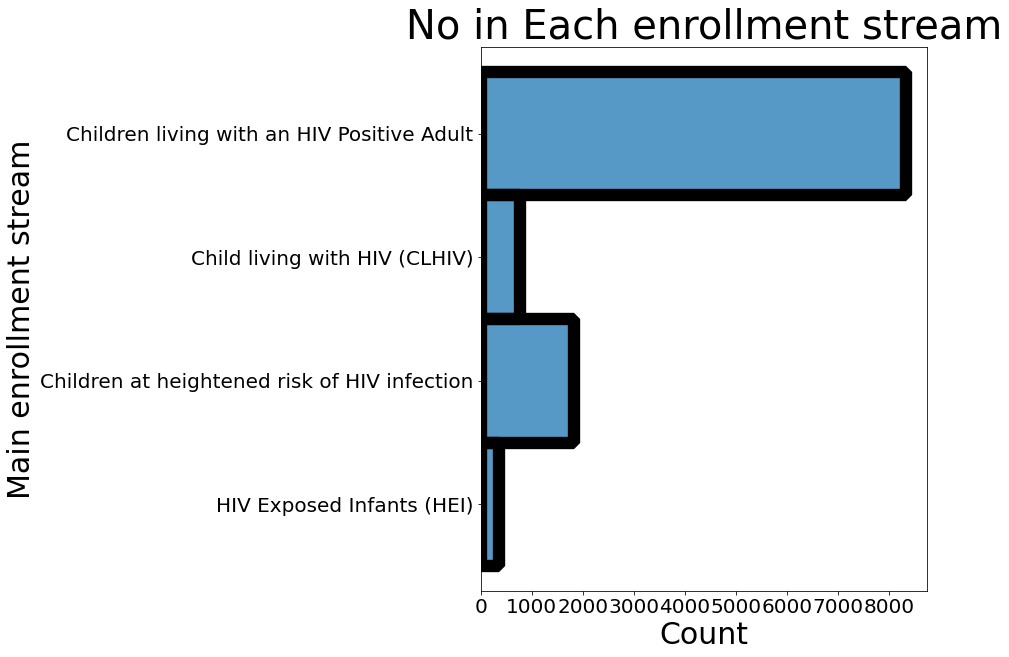

In [19]:
plt.figure(figsize=(8,10))
sns.histplot(data= child_reg, y='Main enrollment stream')
plt.xlabel('Count',fontsize=30)
plt.ylabel('Main enrollment stream',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("No in Each enrollment stream", fontsize=40)
plt.savefig('/Users/Blessing/Desktop/MSC_Dissertation_Data/Datasets/Enrollment_stream')

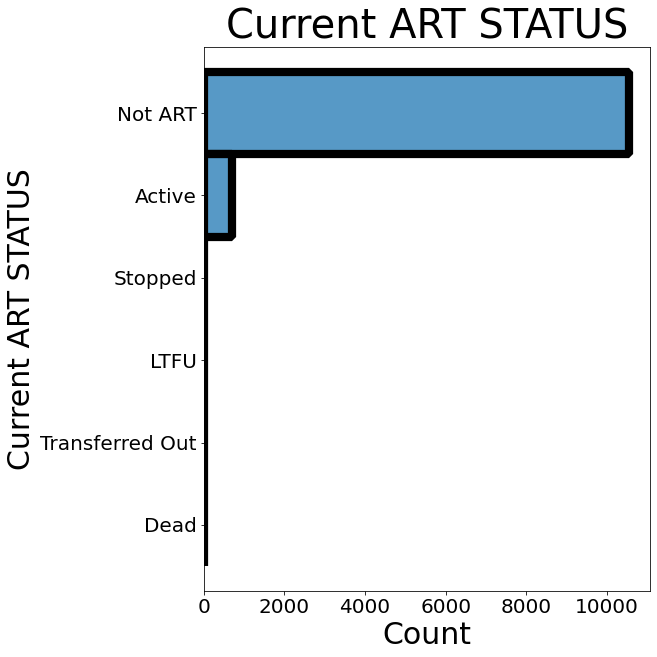

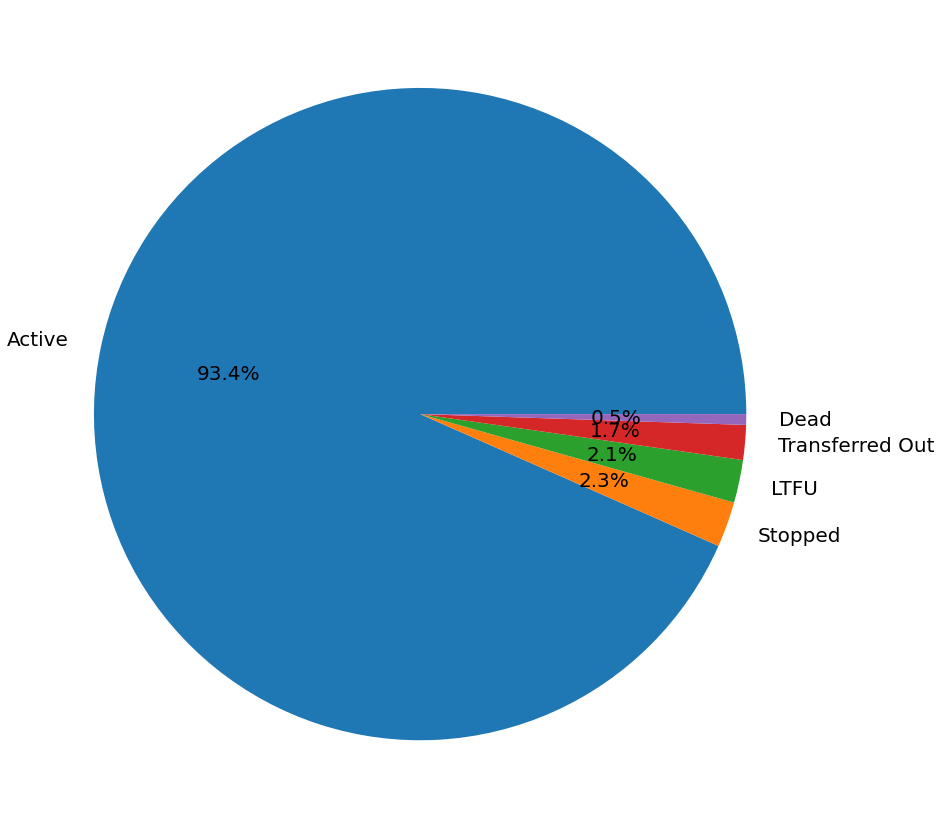

In [20]:
plt.figure(figsize=(8,10))
sns.histplot(data= child_reg, y='Current ART STATUS')
plt.xlabel('Count',fontsize=30)
plt.ylabel('Current ART STATUS',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Current ART STATUS", fontsize=40)
plt.savefig('/Users/Blessing/Desktop/MSC_Dissertation_Data/Datasets/Enrollment_stream')

plt.figure(figsize=(15,15))
CLHIV = child_reg.drop(child_reg[child_reg['Current ART STATUS'].isin(['Not ART'])].index)

plt.pie(CLHIV['Current ART STATUS'].value_counts(),labels=['Active','Stopped', 'LTFU','Transferred Out','Dead'],autopct='%1.1f%%', textprops={'fontsize': 20})
plt.show()

## Bivarate Analysis

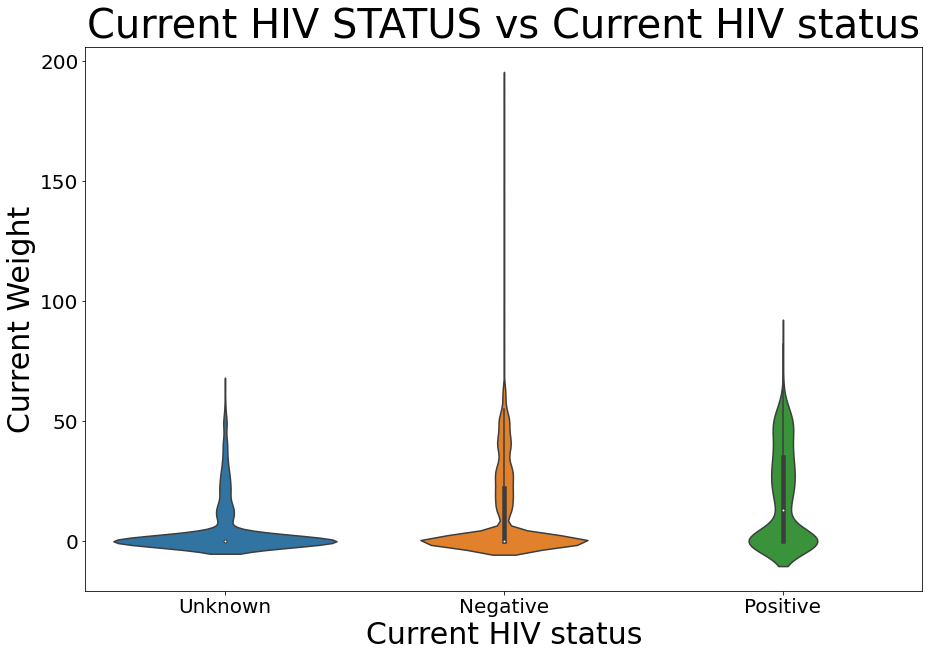

In [21]:
plt.figure(figsize=(15,10))
sns.violinplot(data= child_reg, y ='Current Weight',x= 'Current HIV status')
plt.xlabel('Current HIV status',fontsize=30)
plt.ylabel('Current Weight',fontsize=30)
plt.xticks(fontsize=20)
#plt.ylim(0,100)
plt.yticks(fontsize=20)
plt.title("Current HIV STATUS vs Current HIV status", fontsize=40)
plt.show()


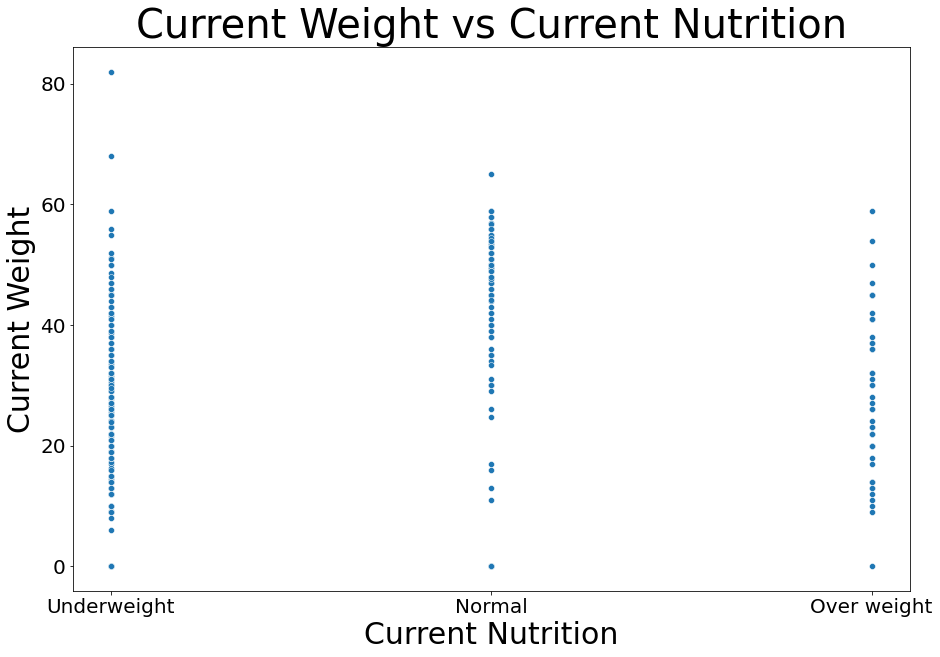

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= CLHIV,y='Current Weight', x='Current Nutrition')
plt.xlabel('Current Nutrition',fontsize=30)
plt.ylabel('Current Weight',fontsize=30)
plt.xticks(fontsize=20)
#plt.ylim(0,100)
plt.yticks(fontsize=20)
plt.title("Current Weight vs Current Nutrition", fontsize=40)
plt.show()


<Figure size 2160x1440 with 0 Axes>

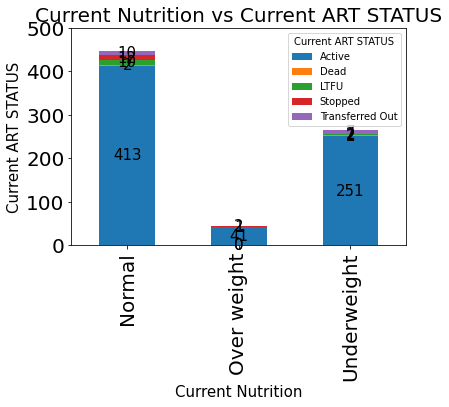

In [23]:
plt.figure(figsize=(30,20))
crossTab = pd.crosstab(CLHIV['Current Nutrition'], CLHIV['Current ART STATUS'], values='OVC Id',aggfunc='count')
ax = crossTab.plot(kind ='bar', stacked =True)
plt.xlabel('Current Nutrition',fontsize=15)
plt.ylabel('Current ART STATUS',fontsize=15)
plt.xticks(fontsize=20)
plt.ylim(0,500)
plt.yticks(fontsize=20)
plt.title("Current Nutrition vs Current ART STATUS", fontsize=20)


# Add value labels to the bars
for container in ax.containers:
    # Loop through the patches of each stack and add the labels
    for patch in container.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() /2
        label = f'{int(patch.get_height()):,}'
        ax.text(x, y, label, ha='center', va='center', color='black', fontsize=15)
        

plt.show()

<Figure size 2160x2160 with 0 Axes>

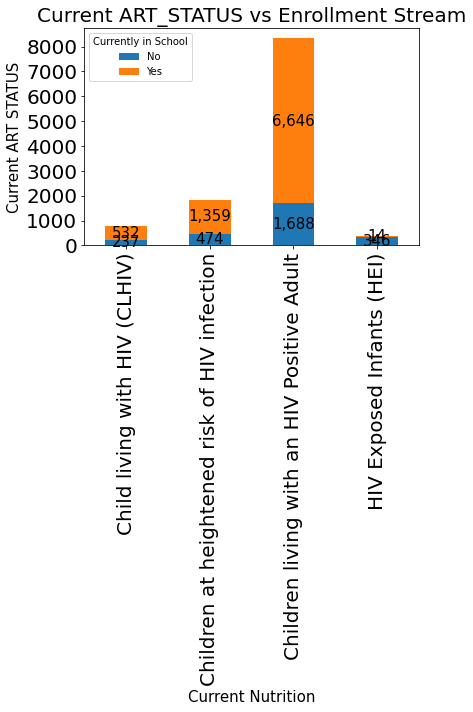

In [24]:
plt.figure(figsize=(30,30))
crossTab = pd.crosstab(child_reg['Main enrollment stream'], child_reg['Currently in School'], values='OVC Id',aggfunc='count')
ax = crossTab.plot(kind ='bar', stacked =True)
plt.xlabel('Current Nutrition',fontsize=15)
plt.ylabel('Current ART STATUS',fontsize=15)
plt.xticks(fontsize=20)

plt.yticks(fontsize=20)
plt.title("Current ART_STATUS vs Enrollment Stream", fontsize=20)


# Add value labels to the bars
for container in ax.containers:
    # Loop through the patches of each stack and add the labels
    for patch in container.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() /2
        label = f'{int(patch.get_height()):,}'
        ax.text(x, y, label, ha='center', va='center', color='black', fontsize=15)
        
plt.show()

### Multivarate Analysis

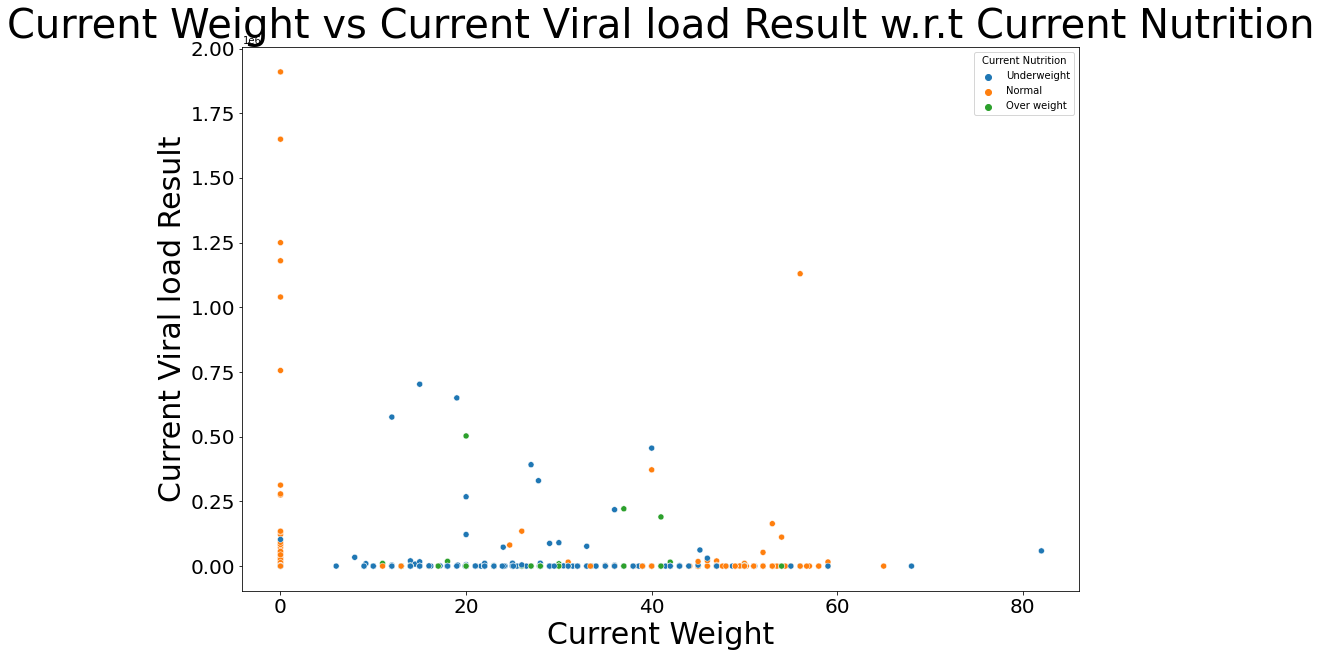

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= CLHIV, x='Current Weight',y='Current Viral load Result', hue='Current Nutrition')
plt.xlabel('Current Weight',fontsize=30)
plt.ylabel('Current Viral load Result',fontsize=30)
plt.xticks(fontsize=20)
#plt.ylim(0,100)
plt.yticks(fontsize=20)
plt.title("Current Weight vs Current Viral load Result w.r.t Current Nutrition", fontsize=40)
plt.show()



## Check for outliers

In [26]:
target_feature = child_reg.CLASS
independent_feature = child_reg.drop(['CLASS'], axis=1)
objectVariable = independent_feature.select_dtypes(include=['object'])
numVariable = independent_feature.select_dtypes(include=['int64', 'float64'])
#floatVariable = child_reg.select_dtypes(include=['object'])

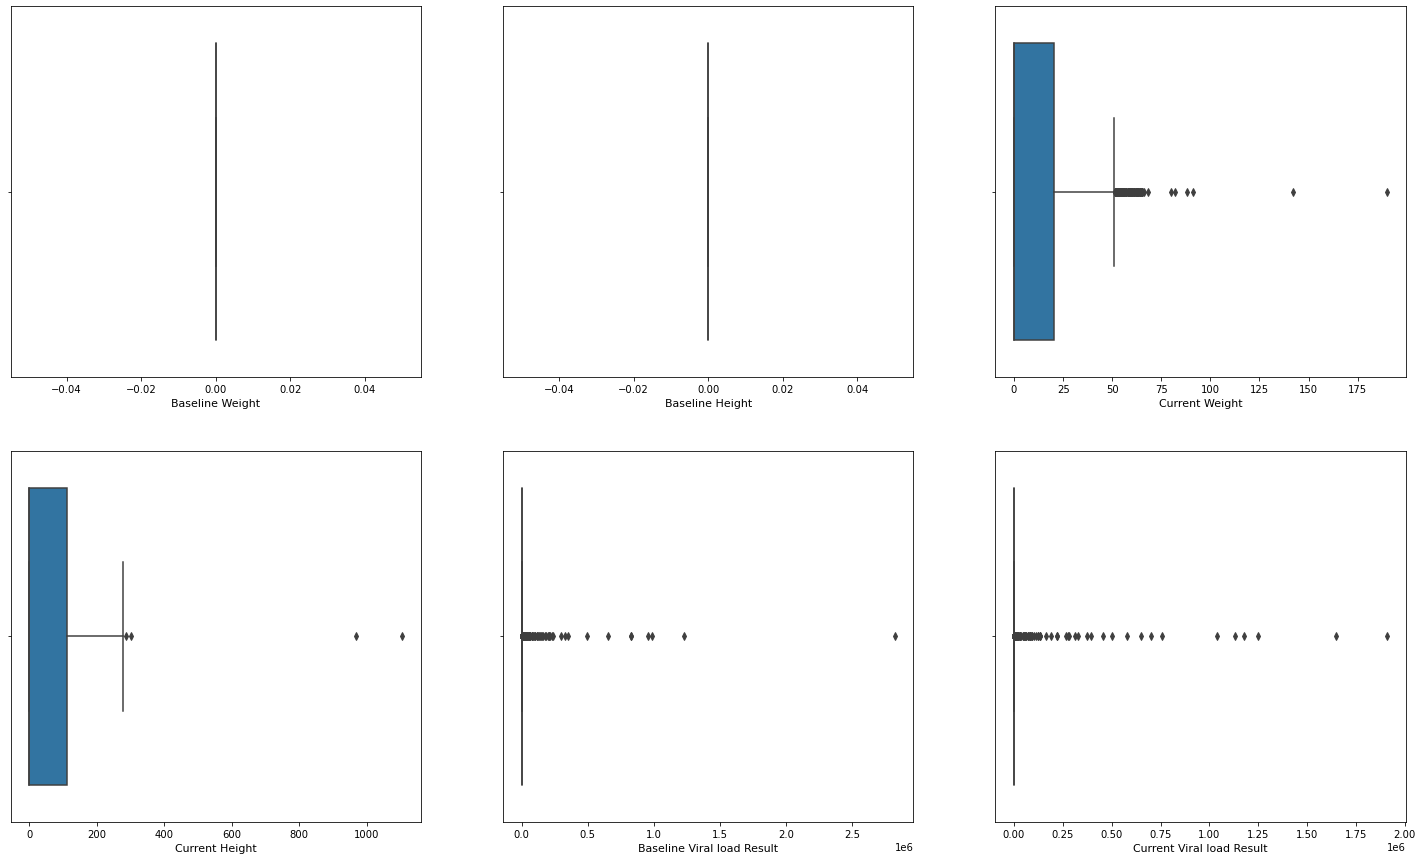

In [27]:
plt.figure(figsize=(25, 15))
for i in range(len(numVariable.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x =numVariable.iloc[:, i])
    plt.xlabel(numVariable.columns[i], size =11)
plt.show()

In [28]:
numVariable.describe()

,Baseline Weight,Baseline Height,Current Weight,Current Height,Baseline Viral load Result,Current Viral load Result
count,11296.0,11296.0,11296.000000,11296.000000,1.129600e+04,1.129600e+04
mean,0.0,0.0,10.949162,44.316286,1.308315e+03,1.543698e+03
std,0.0,0.0,17.025734,63.765152,3.556658e+04,3.646958e+04
min,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.0,0.0,20.500000,112.000000,0.000000e+00,0.000000e+00
max,0.0,0.0,190.000000,1105.000000,2.820000e+06,1.910000e+06


## Treating Ouliers

In [29]:
# Winsorize 
"""from scipy.stats.mstats import winsorize

# Winsorize the numerical variable
df['numerical_var'] = winsorize(df['numerical_var'], limits=[0.05, 0.05])"""

 #Logarithmic transformation of the numerical variable
"""df['numerical_var'] = np.log(df['numerical_var'])

# Square root transformation of the numerical variable
df['numerical_var'] = np.sqrt(df['numerical_var'])
"""
# Create bins based on the numerical variable
"""bins = pd.cut(df['numerical_var'], bins=3, labels=['low', 'medium', 'high'])

# Replace the numerical variable with the bin labels
df['numerical_var'] = bins"""

#ZSCORE
from scipy.stats import zscore
# Calculate the z-score for each data point
z = np.abs(zscore(numVariable))

# Remove outliers based on the z-score
df = numVariable[(z < 3).all(axis=1)]

# Calculate the IQR for each column
Q1 = numVariable.quantile(0.25)
Q3 = numVariable.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on the IQR
numVariable = numVariable[~((numVariable < (Q1 - 1.5 * IQR)) | (numVariable > (Q3 + 1.5 * IQR))).any(axis=1)]

## Data Encoding

In [30]:
import warnings

class EncodeCategoricalVariable(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        s = (X.dtypes == 'object')
        object_cols = list(s[s].index)
        encoder = OneHotEncoder(handle_unknown="ignore")
        X_encoded = encoder.fit_transform(X[object_cols])
        X.drop(object_cols, axis=1, inplace=True)
        X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=encoder.get_feature_names())
        X = pd.concat([X, X_encoded_df], axis=1)
        return X

## OVC ONEHOT ENCODER

In [31]:
warnings.filterwarnings('ignore')
catVar =EncodeCategoricalVariable()
encodedData = catVar.fit_transform(objectVariable)
fullData = pd.concat([numVariable,encodedData],axis =1)
fullData.fillna(fullData.mean(),inplace=True)



## OVC Label Encoder

In [32]:
for column in independent_feature.columns:
    if independent_feature[column].dtype == np.number:
        continue 
    independent_feature[column] = LabelEncoder().fit_transform(independent_feature[column])  
independent_feature

,LGA,CBO,Date of enrollment (yyyy-mm-dd),Enrollment setting,Current age,Sex(M/F),Date of Current HIV status,Current enrollment status,Date of current status,Main enrollment stream,...,Treatment ID,Baseline ART STATUS,Current ART STATUS,Baseline Viral load Result,Baseline Viral load Status,Current Viral load Result,Current Viral load Status,relationship to child,Child has case plan?,Date case plan developed
0,6,0,276,0,2,1,0,2,24,2,...,356,2,3,0.0,2,0.0,2,3,0,0
1,12,0,115,0,19,1,539,2,34,2,...,356,2,3,0.0,2,0.0,2,5,0,0
2,7,1,259,0,11,1,895,2,98,2,...,356,2,3,0.0,2,0.0,2,5,0,0
3,3,2,225,0,10,1,802,2,34,2,...,356,2,3,0.0,2,0.0,2,5,0,0
4,7,1,76,1,10,1,300,2,35,0,...,492,0,0,10.0,0,39.0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,0,1,88,0,9,1,424,2,39,2,...,356,2,3,0.0,2,0.0,2,0,0,0
11292,12,0,138,0,2,1,589,2,96,2,...,356,2,3,0.0,2,0.0,2,5,0,0
11293,12,0,52,0,13,0,271,2,40,2,...,356,2,3,0.0,2,0.0,2,5,0,0
11294,3,2,1,0,15,0,6,2,55,2,...,356,2,3,0.0,2,0.0,2,0,0,0


## HH one hot Encoder

In [33]:
target_feature_HH = HH_reg.Target
Predictor = HH_reg.drop(['Target'], axis=1)
cat_variable = Predictor.select_dtypes(include=['object'])
num_variable = Predictor.select_dtypes(include=['int64', 'float64'])

encodedData_HH = catVar.fit_transform(cat_variable)
fullData_HH = pd.concat([num_variable,encodedData_HH],axis =1)
fullData_HH.fillna(fullData_HH.mean(),inplace=True)

## HH label Encoder

In [34]:
for column in Predictor.columns:
    if Predictor[column].dtype == np.number:
        continue 
    Predictor[column] = LabelEncoder().fit_transform(Predictor[column])  
Predictor

,LGA,CBO,Date of enrollment (yyyy-mm-dd),Current age,Sex(M/F),Address,Occupation,Education level,Current enrollment status,Date of current status,...,Baseline Risk Assesment,Current Risk Assessment,Baseline Adherence,Current Adherence,Baseline Stable,Current Stable,All adolescents 10-17 years of age in the household have key knowledge about preventing HIV infection,"Children, adolescent or caregivers in the household reported experience(s) of violence in the last 6 month",All children and adolescent enrolled in school have attended regularly and progressed in the last year,Caregiver is engaged in economic activities that helps meet the critical needs of the children in the household
0,12,0,197,17,0,2821,3,0,0,197,...,0,1,1,1,0,8,0,0,1,0
1,4,3,136,59,0,3009,0,0,0,136,...,0,0,1,1,1,11,0,0,1,1
2,12,0,231,39,1,360,3,0,0,231,...,0,1,1,1,1,6,0,0,1,0
3,4,3,62,22,0,2991,3,1,0,62,...,0,1,1,1,1,11,0,0,1,1
4,4,3,124,18,0,3006,0,0,0,124,...,1,0,1,1,1,11,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,12,0,17,20,0,276,3,0,0,17,...,1,1,1,1,1,6,0,0,1,1
3331,10,0,80,23,0,2009,3,0,0,80,...,0,1,1,1,1,6,0,0,1,0
3332,7,1,93,23,0,1562,0,0,0,93,...,1,1,1,1,1,1,1,1,1,0
3333,6,0,229,13,1,132,3,0,0,229,...,0,1,1,1,1,6,1,0,1,1


In [35]:
Predictor.columns

Index(['LGA', 'CBO', 'Date of enrollment (yyyy-mm-dd)', 'Current age',
       'Sex(M/F)', 'Address', 'Occupation', 'Education level',
       'Current enrollment status', 'Date of current status',
       'Baseline HIV status', 'Current HIV status',
       'Date of Current HIV status', 'Enrolled on treatment', 'Treatment ID',
       'Baseline ART STATUS ', 'Current ART STATUS',
       'Baseline Viral load Result', 'Current Viral load Result',
       'Date created', 'Last modified', 'Baseline Safety', 'Current Safety',
       'Baseline Risk Assesment', 'Current Risk Assessment',
       'Baseline Adherence', 'Current Adherence', 'Baseline Stable',
       'Current Stable',
       'All adolescents 10-17 years of age in the household have key knowledge about preventing HIV infection',
       'Children, adolescent or caregivers in the household reported experience(s) of violence in the last 6 month',
       'All children and adolescent enrolled in school have attended regularly and progressed 

## Dimensionality Reduction

In [36]:
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
pca = PCA(n_components=13)

pca.fit(fullData)

X_pca = pca.transform(fullData)
# print the explained variance ratio for each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

print(X_pca.shape)


col_names = ['PC{}'.format(i+1) for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=col_names)

Explained variance ratio: [9.90111689e-01 6.51561790e-03 3.62633725e-04 3.06269266e-04
 2.07997928e-04 1.71140965e-04 1.49080055e-04 1.46579332e-04
 1.13443160e-04 1.09217936e-04 9.07986353e-05 7.07288076e-05
 6.08217676e-05]
(11296, 13)


## Feature Scaling

### OVC

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer,StandardScaler
X_arr= independent_feature.values
#X_arr = array[:,0:10]
Y = target_feature.values
demo= MinMaxScaler(feature_range=(0,1))
rescaledX= demo.fit_transform(X=X_arr)
scaler = Normalizer().fit(rescaledX)
normalizedX= scaler.transform(rescaledX)
rescaledXdf = pd.DataFrame(normalizedX)
rescaledXdf.columns = [independent_feature.columns]
#rescaledXdf['Target'] = Y
rescaledXdf

,LGA,CBO,Date of enrollment (yyyy-mm-dd),Enrollment setting,Current age,Sex(M/F),Date of Current HIV status,Current enrollment status,Date of current status,Main enrollment stream,...,Treatment ID,Baseline ART STATUS,Current ART STATUS,Baseline Viral load Result,Baseline Viral load Status,Current Viral load Result,Current Viral load Status,relationship to child,Child has case plan?,Date case plan developed
0,0.143813,0.000000,0.277569,0.000000,0.023010,0.287626,0.000000,0.287626,0.039446,0.191751,...,0.135086,0.143813,0.172576,0.000000,0.287626,0.000000,0.287626,0.123268,0.0,0.0
1,0.276163,0.000000,0.111044,0.000000,0.209884,0.276163,0.156851,0.276163,0.053654,0.184108,...,0.129702,0.138081,0.165698,0.000000,0.276163,0.000000,0.276163,0.197259,0.0,0.0
2,0.172823,0.098756,0.268298,0.000000,0.130358,0.296268,0.279410,0.296268,0.165910,0.197512,...,0.139144,0.148134,0.177761,0.000000,0.296268,0.000000,0.296268,0.211620,0.0,0.0
3,0.071442,0.190511,0.224816,0.000000,0.114307,0.285766,0.241501,0.285766,0.055520,0.190511,...,0.134212,0.142883,0.171460,0.000000,0.285766,0.000000,0.285766,0.204119,0.0,0.0
4,0.174664,0.099808,0.079567,0.299424,0.119770,0.299424,0.094655,0.299424,0.059885,0.000000,...,0.194349,0.000000,0.000000,0.000001,0.000000,0.000006,0.000000,0.213874,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,0.000000,0.097306,0.089820,0.000000,0.105090,0.291917,0.130424,0.291917,0.065056,0.194611,...,0.137101,0.145958,0.175150,0.000000,0.291917,0.000000,0.291917,0.000000,0.0,0.0
11292,0.273068,0.000000,0.131760,0.000000,0.021845,0.273068,0.169481,0.273068,0.149798,0.182046,...,0.128249,0.136534,0.163841,0.000000,0.273068,0.000000,0.273068,0.195049,0.0,0.0
11293,0.293043,0.000000,0.053280,0.000000,0.152382,0.000000,0.083682,0.293043,0.066981,0.195362,...,0.137629,0.146521,0.175826,0.000000,0.293043,0.000000,0.293043,0.209316,0.0,0.0
11294,0.088139,0.235039,0.001233,0.000000,0.211535,0.000000,0.002229,0.352558,0.110804,0.235039,...,0.165581,0.176279,0.211535,0.000000,0.352558,0.000000,0.352558,0.000000,0.0,0.0


### Caregiver/ Household

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer,StandardScaler
X_arr= Predictor.values
#X_arr = array[:,0:10]
Y = target_feature_HH##.values
#demo= MinMaxScaler(feature_range=(0,1))
rescaledX2= demo.fit_transform(X=X_arr)
scaler2 = Normalizer().fit(rescaledX2)
normalizedX2= scaler2.transform(rescaledX2)
rescaledXdf2 = pd.DataFrame(normalizedX2)
rescaledXdf2.columns = [Predictor.columns]
#rescaledXdf['Target'] = Y
rescaledXdf2

,LGA,CBO,Date of enrollment (yyyy-mm-dd),Current age,Sex(M/F),Address,Occupation,Education level,Current enrollment status,Date of current status,...,Baseline Risk Assesment,Current Risk Assessment,Baseline Adherence,Current Adherence,Baseline Stable,Current Stable,All adolescents 10-17 years of age in the household have key knowledge about preventing HIV infection,"Children, adolescent or caregivers in the household reported experience(s) of violence in the last 6 month",All children and adolescent enrolled in school have attended regularly and progressed in the last year,Caregiver is engaged in economic activities that helps meet the critical needs of the children in the household
0,0.307742,0.000000,0.214223,0.081744,0.000000,0.281772,0.184645,0.000000,0.0,0.214223,...,0.000000,0.307742,0.307742,0.307742,0.000000,0.223812,0.000000,0.000000,0.307742,0.000000
1,0.096503,0.289508,0.139128,0.266890,0.000000,0.282743,0.000000,0.000000,0.0,0.139128,...,0.000000,0.000000,0.289508,0.289508,0.289508,0.289508,0.000000,0.000000,0.289508,0.289508
2,0.270459,0.000000,0.220763,0.164811,0.270459,0.031602,0.162275,0.000000,0.0,0.220763,...,0.000000,0.270459,0.270459,0.270459,0.270459,0.147523,0.000000,0.000000,0.270459,0.000000
3,0.096190,0.288571,0.063220,0.099196,0.000000,0.280141,0.173142,0.041224,0.0,0.063220,...,0.000000,0.288571,0.288571,0.288571,0.288571,0.288571,0.000000,0.000000,0.288571,0.288571
4,0.088927,0.266780,0.116893,0.075032,0.000000,0.260285,0.000000,0.000000,0.0,0.116893,...,0.266780,0.000000,0.266780,0.266780,0.266780,0.266780,0.000000,0.266780,0.266780,0.266780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,0.294453,0.000000,0.017688,0.092017,0.000000,0.026378,0.176672,0.000000,0.0,0.017688,...,0.294453,0.294453,0.294453,0.294453,0.294453,0.160611,0.000000,0.000000,0.294453,0.294453
3331,0.266413,0.000000,0.090373,0.114891,0.000000,0.208461,0.191817,0.000000,0.0,0.090373,...,0.000000,0.319695,0.319695,0.319695,0.319695,0.174379,0.000000,0.000000,0.319695,0.000000
3332,0.168593,0.096339,0.094977,0.103865,0.000000,0.146525,0.000000,0.000000,0.0,0.094977,...,0.289017,0.289017,0.289017,0.289017,0.289017,0.026274,0.289017,0.289017,0.289017,0.000000
3333,0.124541,0.000000,0.201553,0.050595,0.249081,0.010671,0.149449,0.000000,0.0,0.201553,...,0.000000,0.249081,0.249081,0.249081,0.249081,0.135862,0.249081,0.000000,0.249081,0.249081


## Feature Selection

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest,chi2, RFE
array=rescaledXdf2.values
X = array
Y = target_feature_HH.values
model = LinearDiscriminantAnalysis()
rfe=RFE(model,n_features_to_select=18)
fit = rfe.fit(X, Y)
#Features = fit.transform(X)
#rfeSelectedDF =pd.DataFrame(Features)
print("Num Features: {}".format(fit.n_features_)) 
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))
Predictor.columns



Num Features: 18
Selected Features: [ True  True  True False False False False  True False False  True  True
  True False False False False  True  True False False False  True  True
  True False  True  True False  True  True  True  True]
Feature Ranking: [ 1  1  1  9  3  8 14  1 16  4  1  1  1  2 11 15 10  1  1  7 12  6  1  1
  1  5  1  1 13  1  1  1  1]


Index(['LGA', 'CBO', 'Date of enrollment (yyyy-mm-dd)', 'Current age',
       'Sex(M/F)', 'Address', 'Occupation', 'Education level',
       'Current enrollment status', 'Date of current status',
       'Baseline HIV status', 'Current HIV status',
       'Date of Current HIV status', 'Enrolled on treatment', 'Treatment ID',
       'Baseline ART STATUS ', 'Current ART STATUS',
       'Baseline Viral load Result', 'Current Viral load Result',
       'Date created', 'Last modified', 'Baseline Safety', 'Current Safety',
       'Baseline Risk Assesment', 'Current Risk Assessment',
       'Baseline Adherence', 'Current Adherence', 'Baseline Stable',
       'Current Stable',
       'All adolescents 10-17 years of age in the household have key knowledge about preventing HIV infection',
       'Children, adolescent or caregivers in the household reported experience(s) of violence in the last 6 month',
       'All children and adolescent enrolled in school have attended regularly and progressed 

In [40]:
Features = fit.transform(X)
rfeSelectedDF =pd.DataFrame(Features)
rfeSelectedDF.columns = ['LGA', 'Ward', 'CBO','HH Unique Id','Baseline HIV status', 'Current HIV status',
                         'Baseline Viral load Result', 'Current Viral load Result','Recorded by', 'Baseline Safety',
                         'Current Safety', 'Baseline Risk Assesment', 'Current Risk Assessment','Current Adherence', 
                         'Baseline Stable',
                         'All adolescents 10-17 years of age in the household have key knowledge about preventing HIV infection',
                        'All children and adolescent enrolled in school have attended regularly and progressed in the last year',
       'Caregiver is engaged in economic activities that helps meet the critical needs of the children in the household']
rfeSelectedDF['Target']= Y

rfeSelectedDF

,LGA,Ward,CBO,HH Unique Id,Baseline HIV status,Current HIV status,Baseline Viral load Result,Current Viral load Result,Recorded by,Baseline Safety,Current Safety,Baseline Risk Assesment,Current Risk Assessment,Current Adherence,Baseline Stable,All adolescents 10-17 years of age in the household have key knowledge about preventing HIV infection,All children and adolescent enrolled in school have attended regularly and progressed in the last year,Caregiver is engaged in economic activities that helps meet the critical needs of the children in the household,Target
0,0.307742,0.000000,0.214223,0.000000,0.153871,0.153871,0.012265,7.896086e-07,0.000000e+00,0.076936,0.000000,0.307742,0.307742,0.000000,0.000000,0.000000,0.307742,0.000000,0
1,0.096503,0.289508,0.139128,0.000000,0.144754,0.144754,0.016047,1.411366e-06,5.735827e-07,0.072377,0.000000,0.000000,0.289508,0.289508,0.000000,0.000000,0.289508,0.289508,1
2,0.270459,0.000000,0.220763,0.000000,0.135229,0.135229,0.099362,7.217044e-06,2.820216e-07,0.067615,0.000000,0.270459,0.270459,0.270459,0.000000,0.000000,0.270459,0.000000,1
3,0.096190,0.288571,0.063220,0.041224,0.000000,0.000000,0.277335,0.000000e+00,0.000000e+00,0.072143,0.000000,0.288571,0.288571,0.288571,0.000000,0.000000,0.288571,0.288571,0
4,0.088927,0.266780,0.116893,0.000000,0.133390,0.133390,0.228895,2.053520e-06,5.285518e-07,0.066695,0.266780,0.000000,0.266780,0.266780,0.000000,0.266780,0.266780,0.266780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,0.294453,0.000000,0.017688,0.000000,0.147227,0.147227,0.110336,7.555121e-07,0.000000e+00,0.171764,0.294453,0.294453,0.294453,0.294453,0.000000,0.000000,0.294453,0.294453,1
3331,0.266413,0.000000,0.090373,0.000000,0.159848,0.159848,0.003515,8.202786e-07,0.000000e+00,0.079924,0.000000,0.319695,0.319695,0.319695,0.000000,0.000000,0.319695,0.000000,0
3332,0.168593,0.096339,0.094977,0.000000,0.144508,0.144508,0.182175,7.415633e-07,3.013732e-07,0.192678,0.289017,0.289017,0.289017,0.289017,0.289017,0.289017,0.289017,0.000000,1
3333,0.124541,0.000000,0.201553,0.000000,0.249081,0.249081,0.217590,0.000000e+00,0.000000e+00,0.166054,0.000000,0.249081,0.249081,0.249081,0.249081,0.000000,0.249081,0.249081,1


# clusters in OVC Program

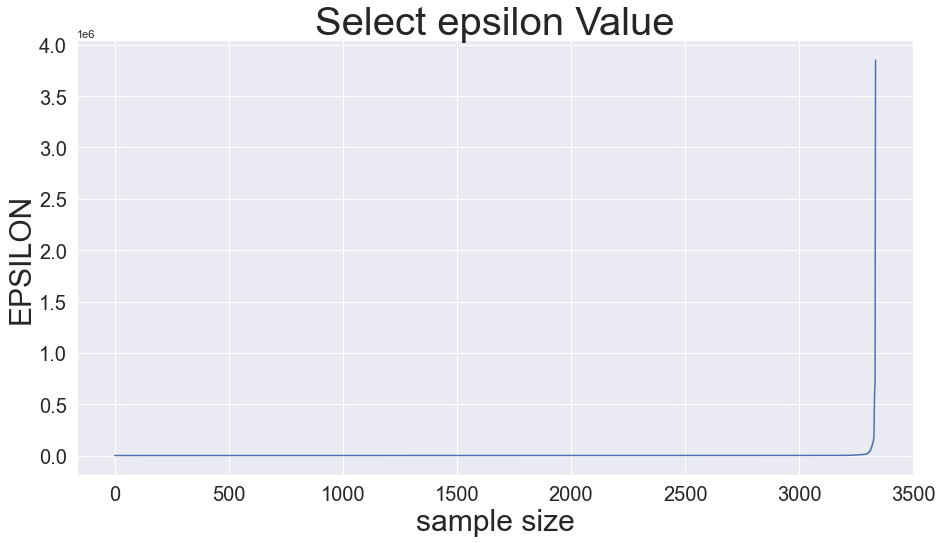

In [41]:
from sklearn.neighbors import NearestNeighbors
sns.set()

NNmodel = NearestNeighbors(n_neighbors=2)
fit_dataset = NNmodel.fit(fullData_HH)
distances,indices = fit_dataset.kneighbors(fullData_HH)
distances =np.sort(distances,axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.ylim(0,500)
plt.xlabel('sample size',fontsize=30)
plt.ylabel('EPSILON',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Select epsilon Value", fontsize=40)
plt.show()

In [42]:
from sklearn.cluster import DBSCAN, KMeans
clustering =DBSCAN(eps=4000, min_samples=16).fit(fullData_HH)
clusters = clustering.labels_
#kmeans_clustering = KMeans(n_clusters=12,random_state=0).fit(fullData_HH)

len(set(clusters))

2

In [43]:
from sklearn.metrics import silhouette_score

silhouette_score(fullData_HH,clusters)

0.8931991806511502

# Model Building

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test= train_test_split(df_pca, target_feature ,test_size=0.3,random_state=42)
X_train2, X_test2, Y_train2, Y_test2= train_test_split(fullData_HH, target_feature_HH ,test_size=0.3,random_state=42)

In [45]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score
models = []

#models.append(('LD', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
#models.append(('LR', LogisticRegression()))



# Model Evaluation Metrics

## OVC_PROGRAM

In [46]:
Results = []
Predicts = []
names = []
AUCs = []


for name, model in models:
    model.fit(X_train, Y_train)
    predicted_Y = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted_Y)
    auc = roc_auc_score(Y_test, predicted_Y)
    AUCs.append(auc)
    report = classification_report(Y_test, predicted_Y, digits=4)
    precision, recall, f1_score = report.split('\n')[-2].split()[:3]
    Predicts.append(accuracy)
    names.append(name)
    msg = (name, accuracy, precision, recall, f1_score,auc)
    print(msg)

('GNB', 0.9253467099439363, 'weighted', 'avg', '0.9285', 0.9204191057303098)
('DTC', 0.9501327825317203, 'weighted', 'avg', '0.9500', 0.9362387659534118)
('RF', 0.9651814694600177, 'weighted', 'avg', '0.9670', 0.96836002710699)
('GBC', 0.9619356742401889, 'weighted', 'avg', '0.9638', 0.9641417410238544)


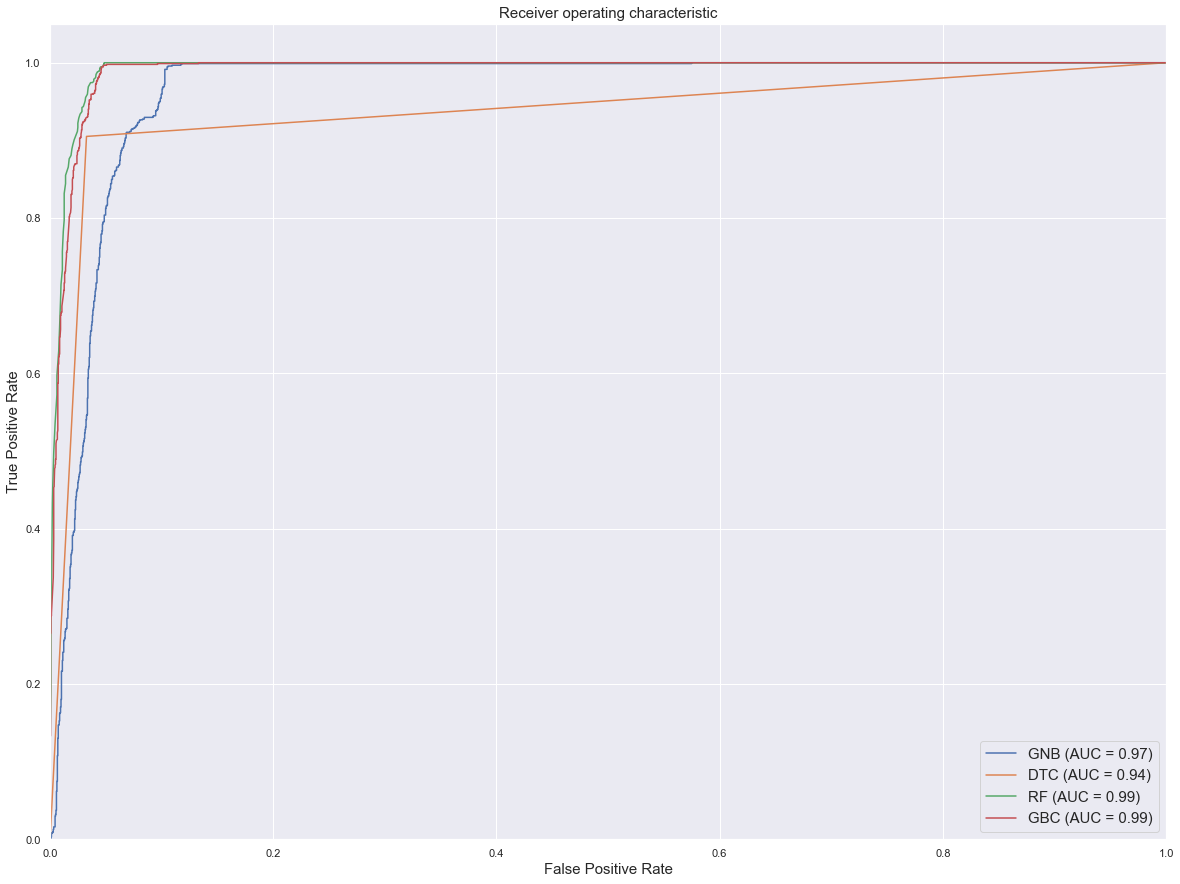

In [47]:
from sklearn.metrics import roc_curve, auc,plot_roc_curve
import matplotlib.pyplot as plt

# Fit the model and predict probabilities
"""model = RandomForestClassifier()
model.fit(X_train, Y_train)
probs = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, probs)

# Compute the area under the curve
roc_auc = auc(fpr, tpr)"""

# Plot the ROC curve
#plt.figure(figsize=(20,15))
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], 'k--')
fig, ax = plt.subplots(figsize=(20, 15))
for name, model in models:
    plot_roc_curve(model, X_test, Y_test, ax=ax, name=name)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize =15)
plt.ylabel('True Positive Rate',fontsize =15)
plt.title('Receiver operating characteristic',fontsize =15)
plt.legend(loc="lower right",fontsize =15)
plt.show()

## Using Scaled Data

In [48]:
X_train3, X_test3, Y_train3, Y_test3= train_test_split(rescaledXdf, target_feature ,test_size=0.3,random_state=42)
Results3 = []
Predicts3 = []
names3 = []
#AUCs3 = []


for name, model in models:
    model.fit(X_train3, Y_train3)
    predicted_Y3 = model.predict(X_test3)
    accuracy3 = accuracy_score(Y_test3, predicted_Y3)
    #auc2 = roc_auc_score(Y_test2, predicted_Y2)
    #AUCs2.append(auc)
    #report = classification_report(Y_test, predicted_Y, digits=4)
    #precision, recall, f1_score = report.split('\n')[-2].split()[:3]
    Predicts3.append(accuracy3)
    names3.append(name)
    msg = (name, accuracy3)
    print(msg)

('GNB', 0.9527884331661257)
('DTC', 0.9828858070227205)
('RF', 0.9817055178518737)
('GBC', 0.9893773974623783)


## HH_Enroll

In [49]:
Results2 = []
Predicts2 = []
names2 = []
AUCs2 = []


for name, model in models:
    model.fit(X_train2, Y_train2)
    predicted_Y2 = model.predict(X_test2)
    accuracy2 = accuracy_score(Y_test2, predicted_Y2)
    auc2 = roc_auc_score(Y_test2, predicted_Y2)
    AUCs2.append(auc)
    #report = classification_report(Y_test, predicted_Y, digits=4)
    #precision, recall, f1_score = report.split('\n')[-2].split()[:3]
    Predicts2.append(accuracy2)
    names2.append(name)
    msg = (name, accuracy2,auc2)
    print(msg)

('GNB', 0.36563436563436563, 0.4964139830910991)
('DTC', 0.8141858141858141, 0.7883300085494442)
('RF', 0.8321678321678322, 0.7923434976726513)
('GBC', 0.8191808191808192, 0.7720623159494634)


# TEST MODEL

In [50]:
HH_reg_tes = pd.read_excel('/Users/Blessing/Desktop/HH_register test .xlsx')
HH_reg_tes['Enrolled on treatment'].fillna(value='No', inplace=True)


if (HH_reg_tes['Enrolled on treatment'] == 'No').all():
    HH_reg_tes['Treatment ID'].fillna(value='No', inplace=True)
else:
    HH_reg_tes['Treatment ID'].fillna(value='Not enrolled', inplace=True)
    
HH_reg_tes['Baseline ART STATUS'].fillna(value='Not ART', inplace=True)    
HH_reg_tes['Current ART STATUS'].fillna(value='Not ART', inplace=True)
HH_reg_tes['Baseline Viral load Result'].fillna(value=0, inplace=True)    
HH_reg_tes['Current Viral load Result'].fillna(value=0, inplace=True)
#HH_reg['Baseline Viral load Status'].fillna(value='no vl', inpla

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Blessing/Desktop/HH_register test .xlsx'

In [ ]:
target_feature_HH_TEST = HH_reg_tes.Target
Predictor = HH_reg_tes.drop(['Target'], axis=1)
cat_variable = Predictor.select_dtypes(include=['object'])
num_variable = Predictor.select_dtypes(include=['int64', 'float64'])

encodedData_HH = catVar.fit_transform(cat_variable)
fullData_HH_TEST = pd.concat([num_variable,encodedData_HH],axis =1)
fullData_HH_TEST.fillna(fullData_HH.mean(),inplace=True)

In [ ]:
#Xtrain, Xtest, Ytrain, Ytest= train_test_split(fullData_HH_TEST, target_feature_HH_TEST ,test_size=0.3,random_state=42)
Results_TEST = []
Predicts_TEST = []
names_TEST = []


for name, model in models:
    predictedY_TEST = model.predict(fullData_HH_TEST)
    accuracyTEST = accuracy_score(target_feature_HH_TEST, predictedY_TEST)
    
    Predicts_TEST.append(accuracyTEST)
    names_TEST.append(name)
    msg = (name, accuracyTEST)
    print(msg)